In [124]:
import sys
import logging
from uuid import UUID

import emission.core.get_database as edb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as pydt
import emission.storage.timeseries.abstract_timeseries as esta
import emission.storage.timeseries.timequery as estt

logging.getLogger().setLevel(logging.DEBUG)
logging.debug(sys.path)
#, UUID("95e70727-a04e-3e33-b7fe-34ab19194f8b")
#, UUID("3bc0f91f-7660-34a2-b005-5c399598a369")
iphone_ids = [UUID("079e0f1a-c440-3d7c-b0e7-de160f748e35"), UUID("c76a0487-7e5a-3b17-a449-47be666b36f6"), 
              UUID("c528bcd2-a88b-3e82-be62-ef4f2396967a")]
android_ids = [UUID("e471711e-bd14-3dbe-80b6-9c7d92ecc296"), UUID("fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7"),
               UUID("86842c35-da28-32ed-a90e-2da6663c5c73")]

In [91]:
list(edb.get_timeseries_db().find({"metadata.key": "config/sensor_config", "data.battery_status": {"$exists": True}}).sort("metadata.write_ts").limit(10))

[{u'_id': ObjectId('56fadecd88f66341cb3618c9'),
  u'data': {u'android_health': u'GOOD',
   u'android_plugged': u'USB',
   u'android_technology': u'Li-ion',
   u'android_temperature': 226,
   u'android_voltage': 226,
   u'battery_level_pct': 100,
   u'battery_status': 5},
  u'metadata': {u'key': u'config/sensor_config',
   u'platform': u'android',
   u'read_ts': 1459281599.629,
   u'time_zone': u'America/Los_Angeles',
   u'type': u'sensor-data',
   u'write_fmt_time': u'2016-03-29T11:56:24.694000-07:00',
   u'write_local_dt': datetime.datetime(2016, 3, 29, 11, 56, 24, 694000),
   u'write_ts': 1459277784.694},
  u'user_id': UUID('e471711e-bd14-3dbe-80b6-9c7d92ecc296')},
 {u'_id': ObjectId('56faecf288f66323bcc68ee9'),
  u'data': {u'android_health': u'GOOD',
   u'android_plugged': u'USB',
   u'android_technology': u'Li-ion',
   u'android_temperature': 197,
   u'android_voltage': 197,
   u'battery_level_pct': 100,
   u'battery_status': 2},
  u'metadata': {u'key': u'config/sensor_config',
   

In [92]:
#type: list of emission.storage.timeseries.builtin_timeseries.BuiltinTimeSeries
iphone_ts = map(lambda u: esta.TimeSeries.get_time_series(u), iphone_ids)
android_ts = map(lambda u: esta.TimeSeries.get_time_series(u), android_ids)

#time query specification
dt1 = pydt.datetime(2016, 7, 30, 10, 0) #diff sync freq: 1m, 10m, 30m, 1hr
dt2 = pydt.datetime(2016, 7, 30, 20, 0)


ts1 = int(dt1.strftime("%s"))
ts2 = int(dt2.strftime("%s"))

time_range = estt.TimeQuery("metadata.write_ts", ts1, ts2)

#BuiltinTimeSeries.get_data_df(key, time_query = None, geo_query = None, extra_query_list=None) 
#type: list of DataFrame objects (regarding state info)
iphone_state_df_list = map(lambda t:t.get_data_df("statemachine/transition", time_range), iphone_ts)
android_state_df_list = map(lambda t:t.get_data_df("statemachine/transition", time_range), android_ts)

iphone_battery_df_list = map(lambda t:t.get_data_df("background/battery", time_range), iphone_ts)
android_battery_df_list = map(lambda t:t.get_data_df("background/battery", time_range), android_ts)

In [118]:
android_test = android_battery_df_list[0]
android_test[['fmt_time', 'battery_level_pct', 'battery_status']]

,fmt_time,battery_level_pct,battery_status
0,2016-07-30T11:18:03.588000-07:00,100.000000,3
1,2016-07-30T12:47:33.131000-07:00,100.000000,3
2,2016-07-30T13:57:21.098000-07:00,100.000000,3
3,2016-07-30T13:58:31.789000-07:00,100.000000,3
4,2016-07-30T14:00:32.346000-07:00,100.000000,1
5,2016-07-30T14:02:31.410000-07:00,100.000000,1
6,2016-07-30T14:04:31.006000-07:00,99.000000,1
7,2016-07-30T14:05:30.799000-07:00,99.000000,1
8,2016-07-30T14:07:31.015000-07:00,99.000000,1
9,2016-07-30T14:08:31.046000-07:00,98.000000,1


In [ ]:
iphone_test = iphone_battery_df_list[2]
iphone_test[['fmt_time', 'battery_level_pct', 'battery_status']]

In [ ]:
def get_ranges_df(battery_df, state_df):
    #the experiment runs until the battery drains completely
    #so start_ts should be the last time it was reported 100% battery level
    full_df = battery_df[battery_df.battery_level_pct == 100]
    if len(full_df)!=0:
        last_full_ts = full_df.iloc[-1].ts 
        start_ts = last_full_ts
    else:
        start_ts = battery_df.iloc[0].ts

    end_ts = battery_df.iloc[-1].ts
    
    #find start_ts & end_ts for the period when battery_status=1=discharging
    #discharging_df = battery_df[battery_df.battery_status == 1]
    #discharging_df.reset_index(inplace=True)
    #start_ts = discharging_df.iloc[0].ts
    #end_ts = discharging_df.iloc[-1].ts
    
    ranges_df = pd.DataFrame({'start_ts': [start_ts], 'end_ts': [end_ts]})
    return ranges_df

In [94]:
def get_ranges_df_list(battery_df_list, state_df_list):
    ranges_df_list = []
    length = len(battery_df_list)
    for i in range(0, length):
        ranges_df_list.append(get_ranges_df(battery_df_list[i], state_df_list[i]))
    return ranges_df_list

In [95]:
iphone_ranges_df_list = get_ranges_df_list(iphone_battery_df_list, iphone_state_df_list)

#iphone_concat_ranges_df = pd.concat([iphone_ranges_df_list[0], iphone_ranges_df_list[1], iphone_ranges_df_list[2], iphone_ranges_df_list[3]])
#print iphone_concat_ranges_df

iphone_ranges_df = pd.DataFrame()
for df in iphone_ranges_df_list:
    iphone_ranges_df = iphone_ranges_df.append(df)

ts_to_dt = lambda t: pydt.datetime.fromtimestamp(t)
iphone_ranges_df['start_dt'] = iphone_ranges_df.start_ts.apply(ts_to_dt)
iphone_ranges_df['end_dt'] = iphone_ranges_df.end_ts.apply(ts_to_dt)

iphone_ranges_df

,end_ts,start_ts,start_dt,end_dt
0,1.469931e+09,1.469913e+09,2016-07-30 14:17:07.146812,2016-07-30 19:17:01.942217
0,1.469932e+09,1.469913e+09,2016-07-30 14:10:08.588889,2016-07-30 19:30:03.682635
0,1.469930e+09,1.469912e+09,2016-07-30 14:00:27.714567,2016-07-30 19:00:11.433458


In [96]:
android_ranges_df_list = get_ranges_df_list(android_battery_df_list, android_state_df_list)

#android_concat_ranges_df = pd.concat([ranges_df_list[0], ranges_df_list[1], ranges_df_list[2], ranges_df_list[3]])
#android_concat_ranges_df

android_ranges_df = pd.DataFrame()
for df in android_ranges_df_list:
    android_ranges_df = android_ranges_df.append(df)
    
ts_to_dt = lambda t: pydt.datetime.fromtimestamp(t)
android_ranges_df['start_dt'] = android_ranges_df.start_ts.apply(ts_to_dt)
android_ranges_df['end_dt'] = android_ranges_df.end_ts.apply(ts_to_dt)
    
android_ranges_df

,end_ts,start_ts,start_dt,end_dt
0,1.469929e+09,1.469913e+09,2016-07-30 14:02:31.410,2016-07-30 18:40:30.291
0,1.469928e+09,1.469905e+09,2016-07-30 12:04:04.945,2016-07-30 18:24:03.096
0,1.469926e+09,1.469909e+09,2016-07-30 13:09:08.921,2016-07-30 17:39:08.194


In [97]:
iphone_start_ts = iphone_ranges_df.start_ts.max() 
iphone_end_ts = iphone_ranges_df.end_ts.min() + 60*60
i_t1 = pydt.datetime.fromtimestamp(iphone_start_ts)
i_t2 = pydt.datetime.fromtimestamp(iphone_end_ts)
print 'iphone_start_ts=' + str(i_t1) + '\n' + 'iphone_end_ts=' + str(i_t2)
print  (iphone_end_ts-iphone_start_ts)/3600.0

android_start_ts = android_ranges_df.start_ts.max() 
android_end_ts = android_ranges_df.end_ts.max() + 60*60
a_t1 = pydt.datetime.fromtimestamp(android_start_ts)
a_t2 = pydt.datetime.fromtimestamp(android_end_ts)
print 'android_start_ts=' + str(a_t1) + '\n' + 'android_end_ts=' + str(a_t2)
print  (android_end_ts-android_start_ts)/3600.0

iphone_start_ts=2016-07-30 14:17:07.146812
iphone_end_ts=2016-07-30 20:00:11.433458
5.7178574017
android_start_ts=2016-07-30 14:02:31.410000
android_end_ts=2016-07-30 19:40:30.291000
5.63302249995


In [98]:
import numpy as np

iphone_xnew = np.arange(iphone_start_ts, iphone_end_ts, 15 * 60) # 15 minutes
print len(iphone_xnew)

android_xnew = np.arange(android_start_ts, android_end_ts, 15 * 60) # 15 minutes
print type(android_xnew)

23
<type 'numpy.ndarray'>


In [99]:
import scipy.interpolate as spi
import numpy as np

def get_interpolated(x, y, xnew):
    # fn = spi.interp1d(x=x, y=y, bounds_error=False, fill_value=y.iloc[-1])
    fn = spi.interp1d(x=x, y=y, bounds_error=False)
    #This class returns a function whose call method uses interpolation to find the value of new points.
    return fn(xnew)

In [100]:
def get_interpolated_df(sensor_df, xnew):
    local_dt_new = map(pydt.datetime.fromtimestamp, xnew)
    fmt_time_new = map(lambda dt: dt.isoformat(), local_dt_new)
    #date.isoformat() Return a string representing the date in ISO 8601 format, ‘YYYY-MM-DD’. 
    # -For example, date(2002, 12, 4).isoformat() == '2002-12-04'.
    interpolated_series = get_interpolated(sensor_df.ts, sensor_df.battery_level_pct, xnew)
    # print "interpolated_series = %s" % interpolated_series
    interpolated_df = pd.DataFrame(data={'ts': xnew, 'metadata_write_ts': xnew, 'local_dt': local_dt_new, 'fmt_time': fmt_time_new, 'battery_level_pct': interpolated_series})
    return interpolated_df

In [101]:
iphone_battery_interp_df_list = map(lambda df: get_interpolated_df(df, iphone_xnew), iphone_battery_df_list)
android_battery_interp_df_list = map(lambda df: get_interpolated_df(df, android_xnew), android_battery_df_list)

In [102]:
label = ['1hr', '1hr', '1hr', '1hr']
style = ['ob', 'og', 'or', 'oc']
title = "TrackingOn_Stationary_HAFS "

ts_to_dt = lambda t: pydt.datetime.fromtimestamp(t)

About to plot 0
About to plot 1
About to plot 2


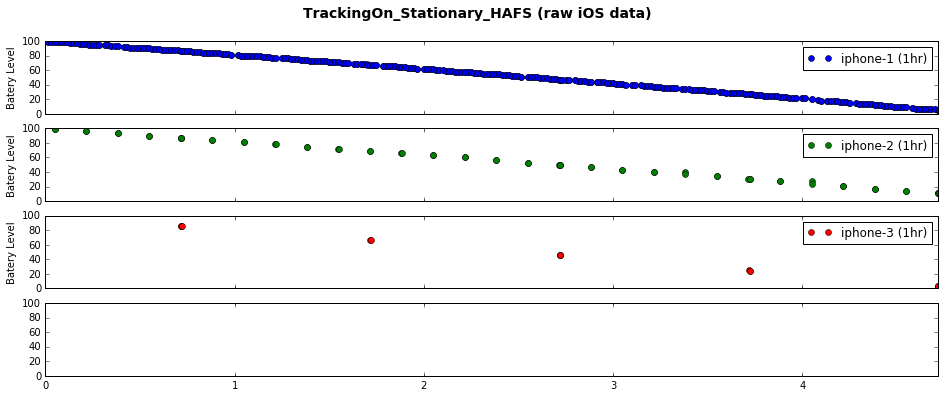

In [103]:
#iOS: No interplation on battery data
(afig, aaxes2d) = plt.subplots(ncols=1, nrows=4, sharex=True, sharey=True, figsize=(16,6))
aaxes = aaxes2d.flatten()

afig.suptitle(title + '(raw iOS data)', fontsize=14, fontweight='bold')

for i, df in enumerate(iphone_battery_df_list):
    print "About to plot %d" % i
    df['hr'] = (df.ts-iphone_start_ts)/3600.0
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=aaxes[i], label="iphone-%s (1hr)" % (i+1))
    aaxes[i].set_xlabel('Hours')
    aaxes[i].set_ylabel('Batery Level')
    aaxes[i].set_xlim(left=0)
    #plt.xticks(np.arange(0, max(df['hr'])+2, 2.0))
    
#afig.savefig('scatter_Apr_2-3_iOS.png')

About to plot 0
About to plot 1
About to plot 2


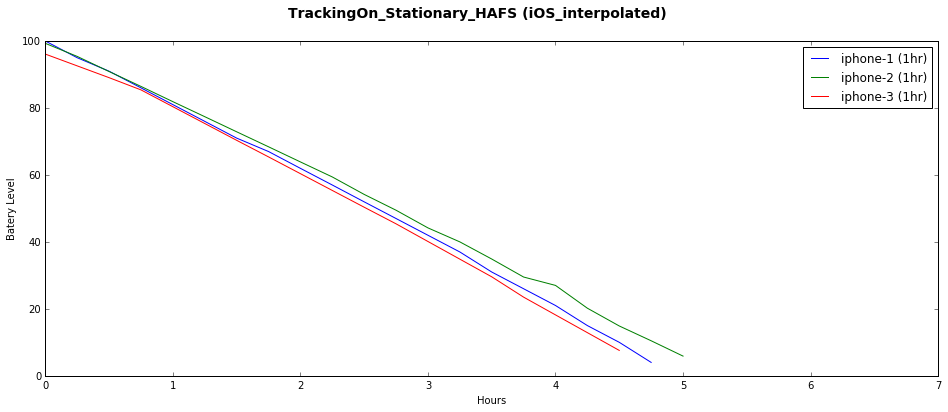

In [132]:
#iOS: With interplation on battery data 
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d
ifig.suptitle(title + '(iOS_interpolated)', fontsize=14, fontweight='bold')

for i, df in enumerate(iphone_battery_interp_df_list):
    print "About to plot %d" % i
    df['hr'] = (df.ts-iphone_start_ts)/3600.0
    df.plot(x='hr', y='battery_level_pct', ax=iaxes, xlim=(0, max(df.hr)), label="iphone-%s (1hr)" % (i+1))
    iaxes.set_xlabel('Hours')
    iaxes.set_ylabel('Batery Level')
    plt.xticks(np.arange(0, max(df.hr)+2, 1))

#ifig.savefig('interp_Apr_2-3_iOS.png') 

About to plot 0
About to plot 1
About to plot 2
About to plot 0
About to plot 1
About to plot 2


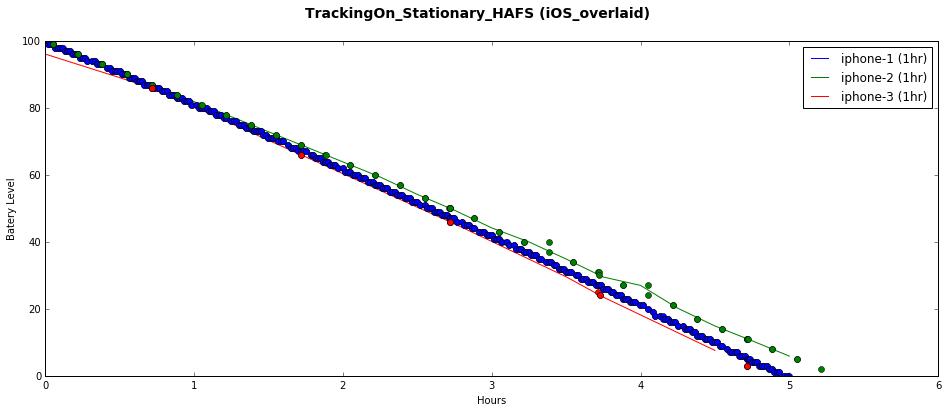

In [131]:
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d
ifig.suptitle(title + '(iOS_overlaid)', fontsize=14, fontweight='bold')

for i, df in enumerate(iphone_battery_interp_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', ax=iaxes, xlim=(0, max(df.hr)), label="iphone-%s (1hr)" % (i+1), legend=True)

for i, df in enumerate(iphone_battery_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=iaxes, xlim=(0, max(df.hr)), legend=False)
    iaxes.set_xlabel('Hours')
    iaxes.set_ylabel('Batery Level')
    plt.xticks(np.arange(0, max(df.hr)+2, 1))

    
#ifig.savefig('overlaid_Apr_2-3_iOS.png')  

In [111]:
def display_per_state_drain(drain_df_map, ground_truth_df, regime_map):
    drain_df_keys = sorted(drain_df_map.keys())
    fig, axes = plt.subplots(nrows=1, ncols=len(drain_df_keys), figsize=(15,3), sharey=True)
    for i, key in enumerate(drain_df_keys):
        print "displaying %d, %s (%s)" % (i, key, regime_map[key])
        drain_df = drain_df_map[key]
        state_diff_df = get_state_diff_df(drain_df, ground_truth_df)
        state_diff_df.boxplot(column='rate', by='state', ax=axes[i], grid=True)
        axes[i].set_title("%s (%s)" % (key, regime_map[key]))
        # print state_diff_df.groupby('state').rate.describe()

    for ax in axes:
        ax.minorticks_on()
        ax.grid(which='both', color='purple')

    # We set the label on only the first graph because we have shared Y
    axes[0].set_ylabel("battery % drain/hr")
    # By default, pandas adds a stupid label like "Boxplot grouped by state".
    # This overlaps with part of the per graph title and looks ugly. And 
    for t in fig.texts:
        t.set_text("")

    return (fig, axes)


In [112]:
iphone_ts = map(lambda u: esta.TimeSeries.get_time_series(u), iphone_ids)
android_ts = map(lambda u: esta.TimeSeries.get_time_series(u), android_ids)

iphone_time_range = estt.TimeQuery("metadata.write_ts", iphone_start_ts, iphone_end_ts)
android_time_range = estt.TimeQuery("metadata.write_ts", android_start_ts, android_end_ts)

iphone_battery_df_discharge_list = map(lambda t:t.get_data_df("background/battery", iphone_time_range), iphone_ts)
android_battery_df_discharge_list = map(lambda t:t.get_data_df("background/battery", android_time_range), android_ts)

In [113]:
import numpy as np
itest = android_battery_df_discharge_list[3]
#print itest.battery_level_pct
print type(itest.battery_level_pct) #<class 'pandas.core.series.Series'>
b = itest.battery_level_pct
delta_b = np.diff(itest.battery_level_pct)
delta_b = np.insert(delta_b, 0, 1)
#print delta_b
ts = itest.metadata_write_ts

rate_df = pd.DataFrame({'delta_b':delta_b, 'ts':ts, 'b':b})
rate_df = rate_df[rate_df.delta_b!=0]
print delta_b
delta_b = rate_df.delta_b[1:]
delta_t = np.diff(rate_df.ts)/3600 #convert from seconds to hrs 
print len(delta_b)
print len(delta_t)
slope_df = pd.DataFrame({'delta_b':delta_b, 'delta_t':delta_t})
slope_df['slope'] = delta_b/delta_t
slope_df['ts'] = rate_df.ts[1:]
slope_df['fmt_time'] = slope_df.ts.apply(ts_to_dt)
slope_df['b'] = rate_df.b[1:]

#remove outliners 
slope_df = slope_df[slope_df.slope>-10 ]
slope_df = slope_df[slope_df.slope<-2 ]

print slope_df

#_, breaks=np.histogram(df.MAT,bins=1)
#(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
#iaxes = iaxes2d
ax = slope_df.boxplot(column='slope')
slope_df.slope.describe()

IndexError: list index out of range

[[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]


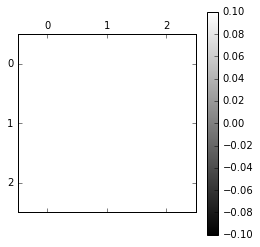

In [114]:
#iOS
#correlation analysis 
#generate list of iphone battery series 
iphone_battery_series_list = map(lambda b: b.battery_level_pct, iphone_battery_interp_df_list)
print np.corrcoef(iphone_battery_series_list)
plt.matshow(np.corrcoef(iphone_battery_series_list), cmap=plt.cm.gray)
plt.colorbar()

3
About to plot 0
About to plot 1
About to plot 2


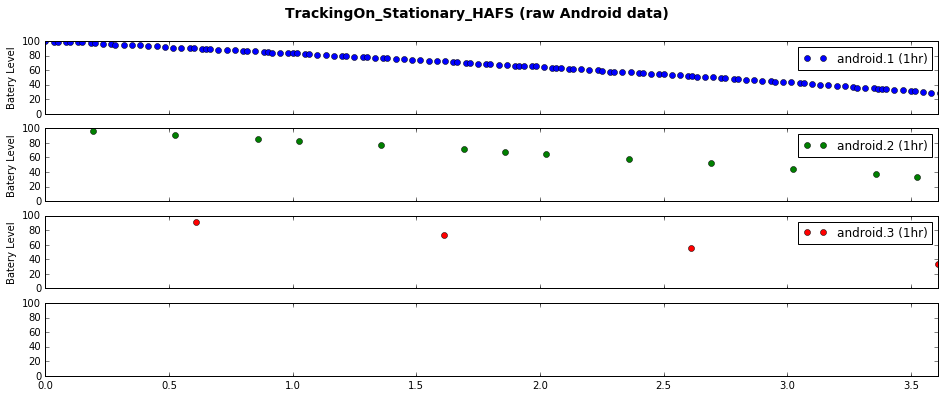

In [115]:
#Android: No interplation on battery data 
print len(android_battery_df_list)
(afig, aaxes2d) = plt.subplots(ncols=1, nrows=4, sharex=True, sharey=True, figsize=(16,6))
aaxes = aaxes2d.flatten()

afig.suptitle(title + '(raw Android data)', fontsize=14, fontweight='bold')

for i, df in enumerate(android_battery_df_list):
    print "About to plot %d" % i
    df['dt'] = df.ts.apply(ts_to_dt)
    df['hr'] = (df.ts-android_start_ts)/3600.0
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=aaxes[i], label="android.%s (1hr)" % (i+1))
    aaxes[i].set_xlabel('Hours')
    aaxes[i].set_ylabel('Batery Level')
    aaxes[i].set_xlim(left=0)
    #plt.xticks(np.arange(0, max(df['hr'])+2, 1))
    
#afig.savefig('scatter_Apr_2-3_Android.png')

About to plot 0
About to plot 1
About to plot 2


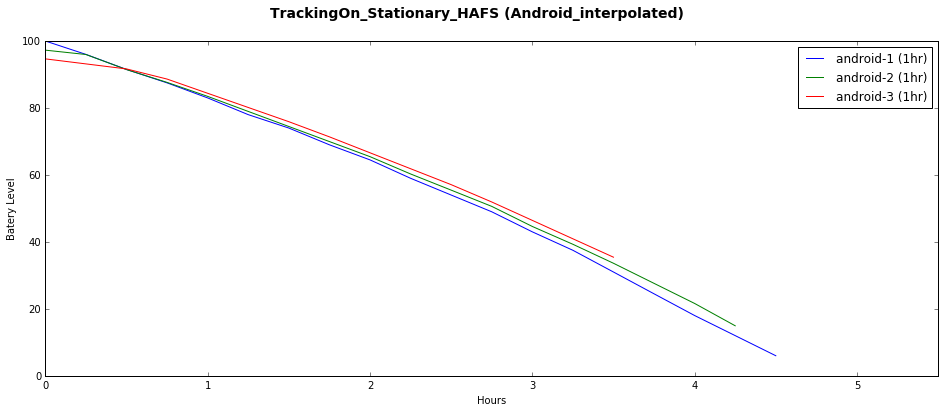

In [126]:
#Android: With interplation on battery data 
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d

ifig.suptitle(title + '(Android_interpolated)', fontsize=14, fontweight='bold')

for i, df in enumerate(android_battery_interp_df_list):
    print "About to plot %d" % i
    df['hr'] = (df.ts-android_start_ts)/3600.0
    df.plot(x='hr', y='battery_level_pct', ax=iaxes, xlim=(0, max(df.hr)), label="android-%s (1hr)" % (i+1))
    iaxes.set_xlabel('Hours')
    iaxes.set_ylabel('Batery Level')
    plt.xticks(np.arange(0, max(df.hr), 1))
    
#ifig.savefig('interp_Apr_2-3_Android.png')    

About to plot 0
About to plot 1
About to plot 2
About to plot 0
About to plot 1
About to plot 2


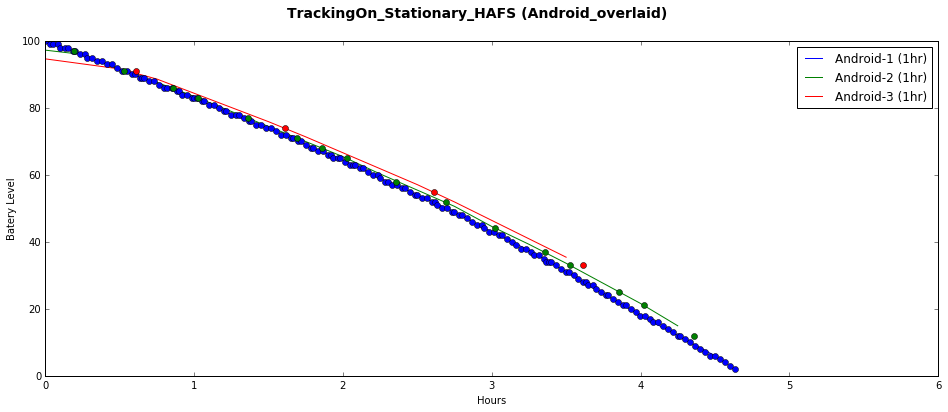

In [127]:
#Android: With interplation on battery data 
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d

ifig.suptitle(title + '(Android_overlaid)', fontsize=14, fontweight='bold')

for i, df in enumerate(android_battery_interp_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', ax=iaxes, xlim=(0, max(df.hr)), label="Android-%s (1hr)" % (i+1), legend=True)


for i, df in enumerate(android_battery_df_list):
    print "About to plot %d" % i
    df.plot(x='hr', y='battery_level_pct', style=style[i], ax=iaxes, xlim=(0, max(df.hr)), legend=False)
    iaxes.set_xlabel('Hours')
    iaxes.set_ylabel('Batery Level')
    plt.xticks(np.arange(0, max(df['hr'])+3, 1))
    #plt.xticks(np.arange(min(df.dt), max(df.dt), 1))
    
#ifig.savefig('overlaid_Apr_2-3_Android.png') 

[[ nan  nan  nan  nan]
 [ nan  nan  nan  nan]
 [ nan  nan  nan  nan]
 [ nan  nan  nan  nan]]


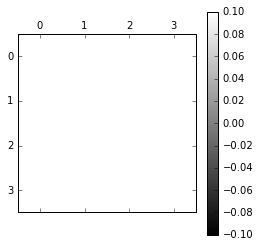

In [88]:
#Android 
#correlation analysis(tracking_off+stationary)
#generate list of android battery series 
android_battery_series_list = map(lambda b: b.battery_level_pct, android_battery_interp_df_list)
print np.corrcoef(android_battery_series_list)
plt.matshow(np.corrcoef(android_battery_series_list), cmap=plt.cm.gray)
plt.colorbar()

In [89]:
l = [1,2]
len(l)

2

In [45]:
l.append(3)
l
len(l)

3